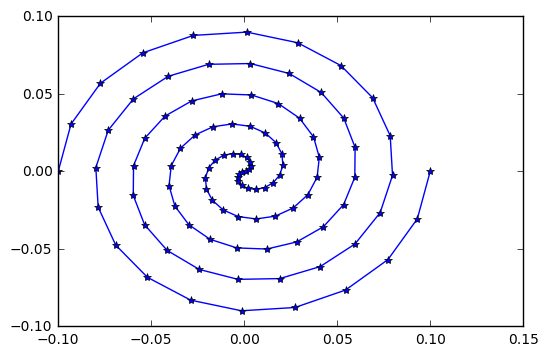

In [95]:
import numpy as np
import scipy 
import matplotlib.pylab as plt

Length = 1.
N = 5
NofSeg = float(N)*20

temp1 = np.linspace(-Length*0.5,Length*0.5,NofSeg)


Size = 0.2

angle = np.absolute(2*np.pi*N*temp1)

xs = [Size*temp_*np.cos(angle_) for temp_,angle_ in zip(temp1,angle)]
ys = [Size*temp_*np.sin(angle_) for temp_,angle_ in zip(temp1,angle)]

plt.plot(xs,ys,"-*")
plt.show()

rr1s = zip(xs,ys)

In [96]:
mesh2 = list()
for iid in xrange(len(rr1s)-1):
    point_start = np.array([rr1s[iid][0],rr1s[iid][1],0.])
    point_end = np.array([rr1s[iid+1][0],rr1s[iid+1][1],0.])
    length = np.dot(point_end-point_start,point_end-point_start)
    length = np.sqrt(length)
    width = 0.1
    zaixe = np.cross(np.array([0,0,1]),point_end-point_start)/length
    mesh2.append([point_start,point_end,length,width,zaixe])

print len(mesh2)


99


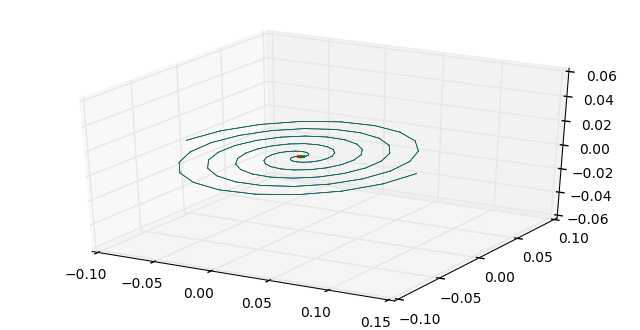

In [97]:
mesh0 = mesh2

try:
    # 设置屋顶基函数 "pos":[0,0]表示正向的线段的线段编号及自由点在线段中的内部编号，'neg':[-1,-1]表示负向的线段是空的（即该屋顶只有一半）
#     rooftops =[{'pos':[0,0],'neg':[1,1]},{'pos':[1,0],'neg':[2,1]},{'pos':[2,0],'neg':[-1,-1]}]
    rooftops =[{'pos':[ii,0],'neg':[ii+1,1]} for ii in xrange(len(mesh0)-1)]
#     rooftops =[{'pos':[ii,0],'neg':[ii+1,1]} for ii in xrange(4)]
    rooftop_attached = [{'Port':[False,0],'V_e':[False,0]} for _ in rooftops]
#     raise
except Exception as e:
    print e
    print rooftops
    raise
    
# 设置端口
try:
    rooftop_attached[len(rooftops)/2]["Port"] = [True,0]
    rooftop_attached[len(rooftops)/2]["V_e"] = [True,0]
except Exception as e:
    print e
    raise
    
# 将网格进行绘制
import matplotlib.pyplot as plt
from pylab import *
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,4))#创建绘制窗口
ax = fig.gca(projection = "3d")#3d坐标轴
ax.hold
print "=="*10
try:
    for idd, cell in enumerate(mesh0):
        data_x = [cell[0][0], cell[1][0]]
        data_y = [cell[0][1], cell[1][1]]
        data_z = [cell[0][2], cell[1][2]]
        ax.plot(data_x,data_y,data_z,"b-",label=u"处理曲线",linewidth=0.5)#处理曲线
        ax.plot(data_x,data_y,data_z,"g",linewidth=0.5)#处理曲线
    for idd, cell in enumerate(rooftop_attached):
        if cell['Port'][0] == True: 
            # 得到线段编号
            iid_pos = rooftops[idd]['pos'][0]
            iid_neg = rooftops[idd]['neg'][0]
            if iid_pos != -1:
                data_x = [mesh0[iid_pos][0][0], mesh0[iid_pos][1][0]]
                data_y = [mesh0[iid_pos][0][1], mesh0[iid_pos][1][1]]
                data_z = [mesh0[iid_pos][0][2], mesh0[iid_pos][1][2]]
                ax.plot(data_x,data_y,data_z,"r",linewidth=2)#处理曲线
            if iid_neg != -1:
                data_x = [mesh0[iid_neg][0][0], mesh0[iid_neg][1][0]]
                data_y = [mesh0[iid_neg][0][1], mesh0[iid_neg][1][1]]
                data_z = [mesh0[iid_neg][0][2], mesh0[iid_neg][1][2]]
                ax.plot(data_x,data_y,data_z,"g",linewidth=2)#处理曲线
            
        
except Exception as e:
    print e
    print rooftops[idd]
    
    
plt.show()